C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


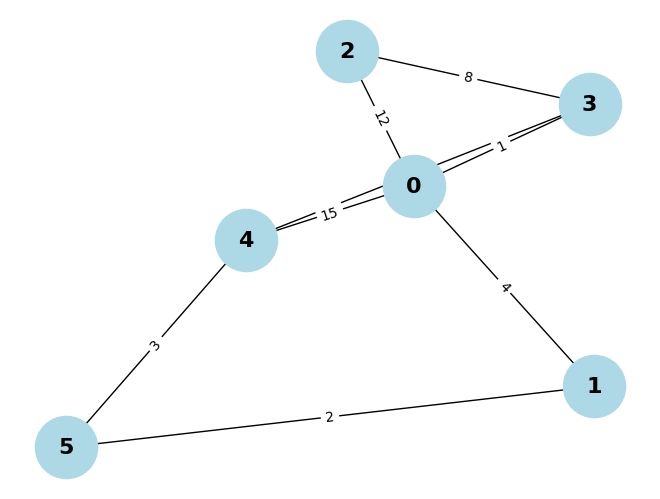

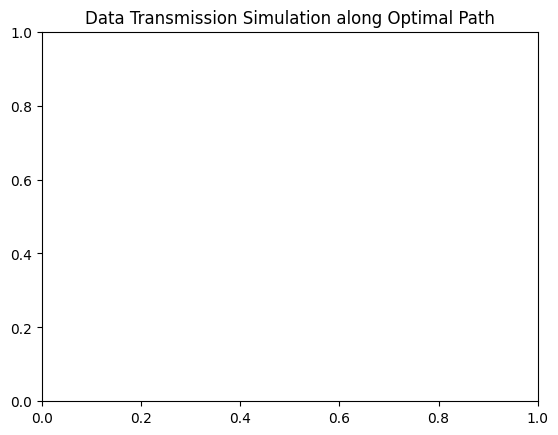

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the graph
G = nx.Graph()

# Add edges with weights (node1, node2, weight)
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path found by the model
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw the entire graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')

# Draw edge labels (weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Function to update the animation
def update(num, path, pos, ax):
    ax.clear()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, nodelist=path[:num+1], node_color='orange', node_size=2000)
    
    # Draw the edges along the path
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges[:num], width=8, alpha=0.7, edge_color='red')

    # Simulate the moving data packet
    if num < len(path) - 1:
        start, end = pos[path[num]], pos[path[num + 1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], 'ro-')

# Create figure and axis
fig, ax = plt.subplots()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(optimal_path), fargs=(optimal_path, pos, ax), interval=1000, repeat=False)

# Show the plot with animation
plt.title("Data Transmission Simulation along Optimal Path")
plt.show()


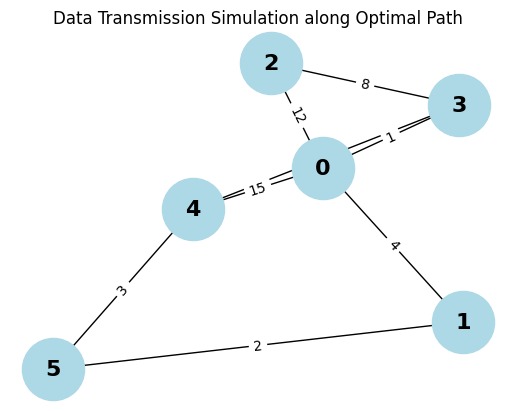

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the graph
G = nx.Graph()

# Add edges with weights (node1, node2, weight)
edges = [(0, 1, 4), (1, 5, 2), (5, 4, 3), (4, 3, 7), (3, 2, 8), (0, 4, 15), (0, 2, 12), (3, 0, 1)]
G.add_weighted_edges_from(edges)

# Define the optimal path found by the model
optimal_path = [3, 4, 5, 1, 0]

# Position the nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw the entire graph initially
fig, ax = plt.subplots()
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', ax=ax)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

# This function will be called repeatedly to update the plot
def update(frame):
    ax.clear()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=16, font_weight='bold', ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    
    # Draw the edges and nodes as usual
    path_edges = list(zip(optimal_path, optimal_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges[:frame], width=8, alpha=0.7, edge_color='red', ax=ax)
    
    # Highlight the current node and the "data packet" moving along the path
    if frame > 0:
        current_node = optimal_path[frame - 1]
        next_node = optimal_path[frame]
        ax.plot([pos[current_node][0], pos[next_node][0]], [pos[current_node][1], pos[next_node][1]], 'ro-', markersize=10)
        nx.draw_networkx_nodes(G, pos, nodelist=[next_node], node_color='orange', node_size=2000, ax=ax)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(optimal_path), interval=1000, repeat=False)

# Display the animation
plt.title("Data Transmission Simulation along Optimal Path")
plt.show()
